In [24]:
import arviz as az
import pandas as pd
import numpy as np
import pymc as pm
import pickle

In [25]:
import os

os.chdir("D:/Manal/phd_ppr_manal/")

In [12]:
with open('trace_enveloppe_2m_0.1.pkl', 'rb') as a:
    trace_env= pickle.load(a)

with open('trace_binomiale.pkl', 'rb') as b:
    trace_bin= pickle.load(b)

with open('trace_seg_2m.pkl', 'rb') as c:
    trace_seg= pickle.load(c)


In [18]:
# extract samples from the trace

samples_env = trace_env.posterior.stack(sample=("chain", "draw"))

# select a random sample from the trace
selected_samples = np.random.choice(range(len(samples_env['p0'])), size=5000, replace=False)

# extract the values of the parameters
p0_sample = samples_env['p0'].values[selected_samples]
lambda_sample = samples_env['lambda'].values[selected_samples]

In [21]:
p_sample_bin = trace_bin.posterior["p"].stack(sample=("chain", "draw")).values
p_sample_bin = np.random.choice(p_sample_bin, size=5000, replace=False)

In [22]:
p_sample_seg= trace_seg.posterior["p"].stack(sample=("chain", "draw")).values
p_sample_seg= np.random.choice(p_sample_seg, size=5000, replace=False)

In [23]:
# Initialize the list for predictions
cumprob_env = []



# Iterate over samples
for j in range(len(lambda_sample)):
    a = lambda_sample[j]
    b = p0_sample[j]
    p_cum = b/(2*a)*(1-np.exp(-2*a))
    cumprob_env.append(p_cum)
    # Iterate over unique combinations of experiment and contact_duration
   

In [ ]:
sero = pd.read_excel("Input/sero_data_binomiale.xlsx")
y = sero["Positive"].to_numpy()  
n = sero["n"].to_numpy()
t = sero["Time"].to_numpy()

In [ ]:
cumprob_bin = []

for i in range(len(p_sample_bin)):
    p_i = p_sample_bin[i]
    p_tot = 1 - (1 - p_i)**t

{'whiskers': [<matplotlib.lines.Line2D at 0x1f96f0aabe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f96f0b7160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f96f0aa940>],
 'medians': [<matplotlib.lines.Line2D at 0x1f96f0b76a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f96f0b7940>],
 'means': []}

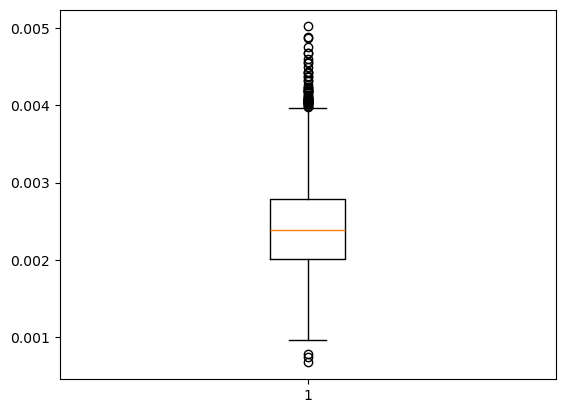

In [20]:
import matplotlib.pyplot as plt


plt.boxplot(cumprob)
